# Lab 3 Script

**Name:** Ryan Baig

**Due:** Tuesday, 5/6

### Part 1
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Load all of the ATLAS data:
atlas_data = np.loadtxt("atlas_z_to_ll.csv", delimiter=",", skiprows=1)
pt1 = atlas_data[:,0] 
pt2 = atlas_data[:,1]
eta1 = atlas_data[:,2]
eta2 = atlas_data[:,3]
phi1 = atlas_data[:,4]
phi2 = atlas_data[:,5]
E1 = atlas_data[:,6]
E2 = atlas_data[:,7]

# 2) Use Equ. 1 and 2 to calculate mass of hypothetical particle which decayed to form pair 

def p_x(pt, phi):
    return pt*np.cos(phi)

def p_y(pt, phi):
    return pt*np.sin(phi)

def p_z(pt, eta):
    return pt*np.sinh(eta)

# Define momenta for each particle

px1 = p_x(pt1, phi1)
py1 = p_y(pt1, phi1)
pz1 = p_z(pt1, eta1)

p1 = np.array([E1, px1, py1, pz1])

#print(p1)

px2 = p_x(pt2, phi2)
py2 = p_y(pt2, phi2)
pz2 = p_z(pt2, eta2)

p2 = np.array([E2, px2, py2, pz2])

#print(p2)

ptot = p1 + p2

#print(ptot)

#Now, calculate total mass with Equ. 2:

def m(E, px, py, pz):
    three_mom = (px**2 + py**2 + pz**2)
    return np.sqrt(E**2 - (three_mom))

M_inv = m(ptot[0], ptot[1], ptot[2], ptot[3])



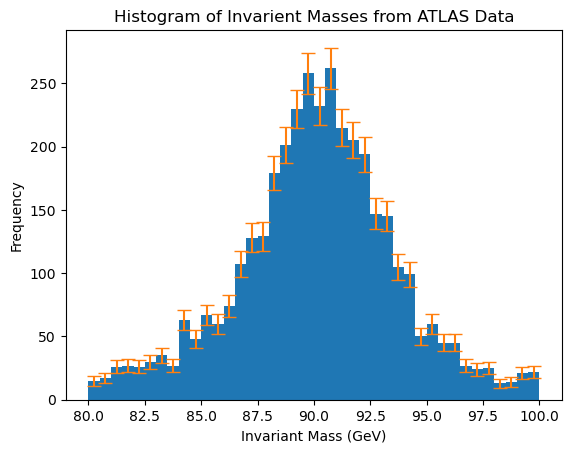

In [2]:
# 3) Make histogram w/ error bars

bins = np.linspace(80,100,41)

N = len(M_inv)/41

fig, ax1 = plt.subplots()
histo, bin_edges = np.histogram(M_inv, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
sigma = np.sqrt(histo)

ax1.hist(M_inv, bins=bins)

ax1.errorbar(bin_centers, histo, yerr=sigma, ls="none", capsize=5) 

ax1.set_xlabel(r"Invariant Mass (GeV)")
ax1.set_ylabel("Frequency")
ax1.set_title("Histogram of Invarient Masses from ATLAS Data");

### Part 2
---

---------------------------
Part 2, Question 4: 
Chi^2 value: 9.985 
Reduced Chi^2 Value: 0.999

p value: 0.442
---------------------------
Part 2, Question 5: best fit of m0 is (90.34 +- 0.09) GeV
---------------------------


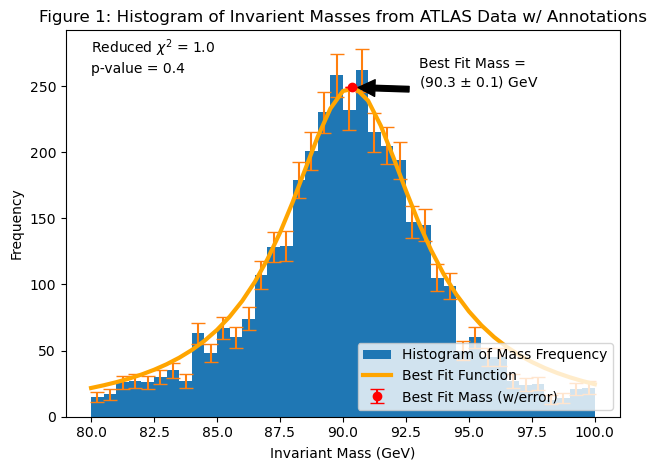

In [3]:
# 1) Create function that returns decay distribution:

def decay(m, m0, L):
    term1 = 1/np.pi 
    fraca = L/2 
    fracb = (m-m0)**2 + (fraca)**2 
    term2 = fraca/fracb
    return term1 * term2

# 2) Fit mass-distribution with Briet-Wigner function

mask = (bin_centers > 87) & (bin_centers < 93)

# 3) Plot new fit 

c = 2.998e8 #m/s

mZ0 = 91.1880 #Gev/c^2
sig_mZ0 = 0.002 #same units

norm = 5000/2
def fit_dec(m, m0, L):
    return norm * decay(m, m0, L)

m0 = (p1[0] + p2[0]) / c**2

m = bin_centers[mask]
y_fit = histo[mask]
yerr = np.sqrt(y_fit)

from scipy.optimize import curve_fit
from scipy import stats

p0 = [91, 3.0]
params, covar = curve_fit(fit_dec, m, y_fit,sigma=yerr, p0=p0, absolute_sigma=True)
m0_fit = params[0]
L_fit = params[1]
L_err = np.sqrt(np.diag(covar))


fit = fit_dec(bins, m0_fit, L_fit)

y_model = fit_dec(m, m0_fit, L_fit)

fig, ax2 = plt.subplots(1,1)

ax2.hist(M_inv, bins=bins, label='Histogram of Mass Frequency')

ax2.errorbar(bin_centers, histo, yerr=sigma, linestyle='none', capsize=5)

ax2.plot(bins, fit, linewidth=3, color='orange', label='Best Fit Function')

ax2.set_xlabel(r"Invariant Mass (GeV)")
ax2.set_ylabel("Frequency")
ax2.set_title("Figure 1: Histogram of Invarient Masses from ATLAS Data w/ Annotations")


# 4) Chi^2 fit and p value: 

chisq = np.sum( (y_fit - y_model)**2 / yerr**2 )
dof = len(y_fit) - 2
chi_red = chisq/dof
p = stats.chi2.sf(chisq, dof)

print("---------------------------")
print(f"Part 2, Question 4: \nChi^2 value: {chisq:.3f} \nReduced Chi^2 Value: {chi_red:.3f}")
print(f"\np value: {p:.3f}")
print("---------------------------")

# 5) Find best fit mass and uncertainty
errs = np.sqrt(np.diag(covar))

m0fit_err = errs[0]

print(f"Part 2, Question 5: best fit of m0 is ({m0_fit:.2f} +- {m0fit_err:.2f}) GeV")
print("---------------------------")

# 6) Annotate plot with best-fit mass (and uncertainty), reduced chi^2, and p-value:

ax2.errorbar(m0_fit, fit_dec(m0_fit, m0_fit, L_fit), yerr=m0fit_err, ls="None", marker="o", c="red", capsize=5, label="Best Fit Mass (w/error)")

ax2.annotate(f"Best Fit Mass =\n" 
rf"({m0_fit:.1f} $\pm$ {m0fit_err:.1f}) GeV", xy=(m0_fit, fit_dec(m0_fit, m0_fit, L_fit)), xytext = (93.0 ,250), arrowprops=dict(facecolor='black', shrink=0.1)) 
ax2.text(80, 275, rf"Reduced $\chi^2$ = {chi_red:.1f}")
ax2.text(80, 260, f"p-value = {p:.1f}")


ax2.legend(loc="lower right")

fig.tight_layout()
#fig.savefig("RBLab3-Figure1", dpi=500)


### Part 3
---

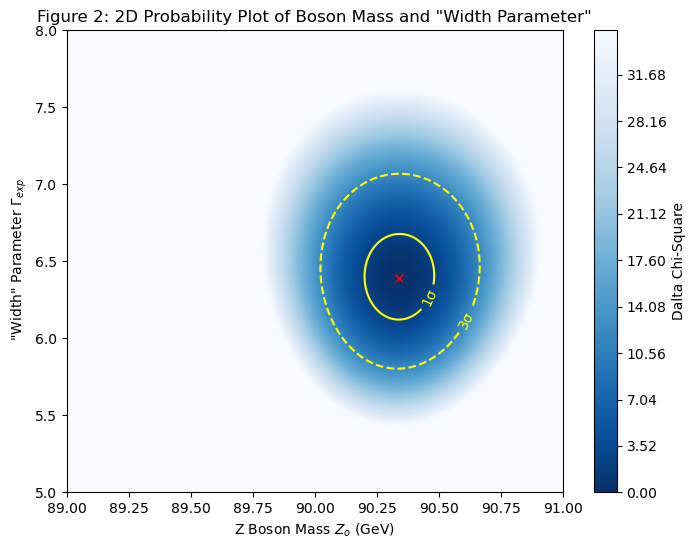

In [4]:
# 1) Perform 2D chisq scan 

n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
M = np.linspace(89,91,n_bins) 
L_scan = np.linspace(5,8,n_bins)

for i, Lv in enumerate(L_scan):
    for j, mv in enumerate(M):
        pred = fit_dec(m, mv, Lv)
        chi_map[i, j] = np.sum(((y_fit-pred)/yerr)**2)

chi_min = np.min(chi_map)
#clip to 35
delta_chi_map =  np.clip(chi_map - chi_min, 0, 35)

# 2) Make filled contour plot:

X, Y = np.meshgrid(M,L_scan)

fig2, ax2 = plt.subplots(figsize=(8,6))

cs = ax2.contourf(X, Y, delta_chi_map, 500, cmap="Blues_r")
cbar = fig2.colorbar(cs, ax=ax2)
cbar.set_label("Dalta Chi-Square")

# 3) Draw in and label 1 and 3 sigma confidence levels onto plot:

levels = [2.3, 11.83]  #1 and 3 sigma lines for chi^2 with N=2 fitting parameters
CS = ax2.contour(X, Y, delta_chi_map, levels = levels, colors=["yellow", "yellow"], 
                 linestyles=["solid", "dashed"])

ax2.clabel(CS, CS.levels, fmt={levels[0]:'1σ', levels[1]:'3σ'})

# 4) Add best fit location and make plot nice:

ax2.plot(m0_fit, L_fit, "rx")
ax2.set_xlabel(r"Z Boson Mass $Z_o$ (GeV)")
ax2.set_ylabel(r' "Width" Parameter $\Gamma_{exp}$')
ax2.set_title('Figure 2: 2D Probability Plot of Boson Mass and "Width Parameter"')

fig.tight_layout()